In [2]:
%load ../src/visualisation/visualize.py


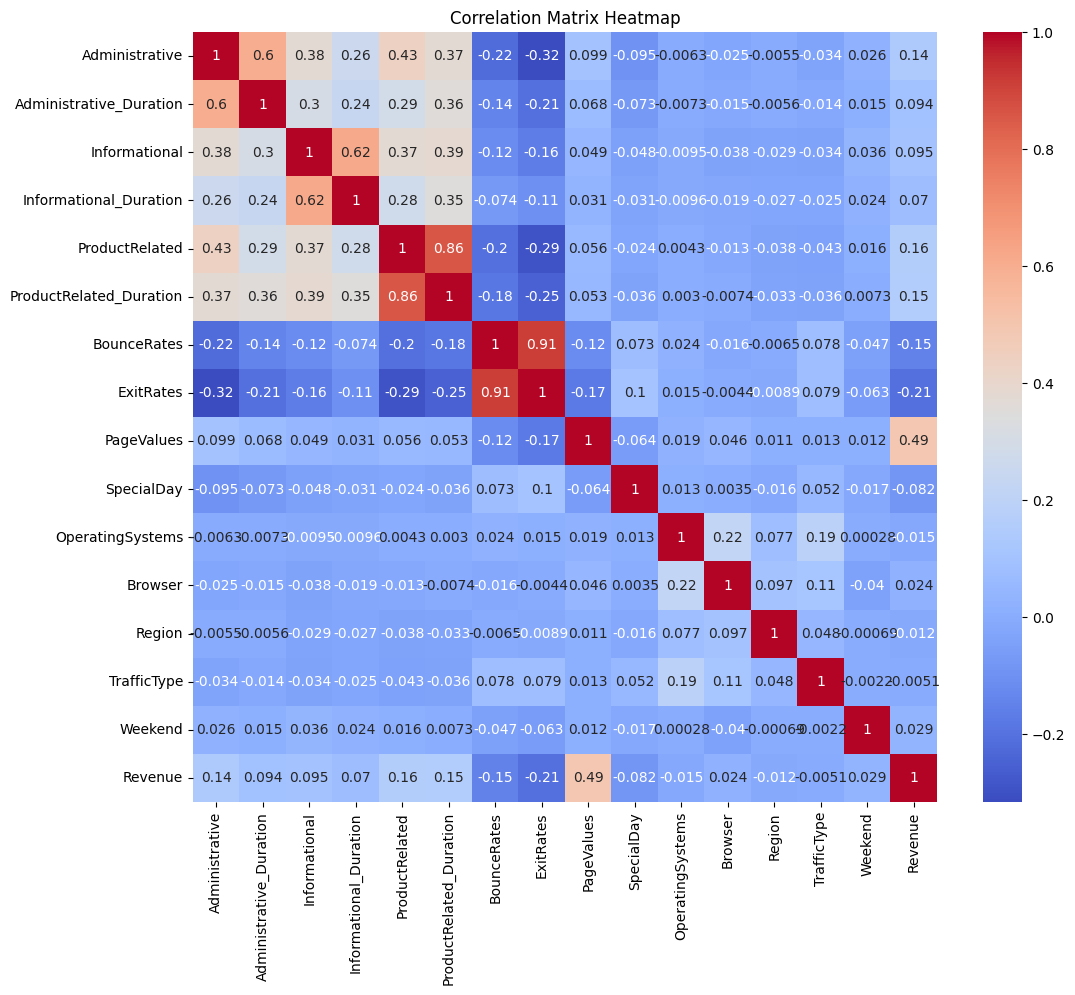

In [3]:
from src.visualisation import plot_correlation_matrix

plot_correlation_matrix('../data/raw/online_shoppers_intention.csv')

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset (make sure to provide the correct path to your csv file)
df = pd.read_csv('../data/raw/online_shoppers_intention.csv')


In [4]:
# Summary statistics for numerical features
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

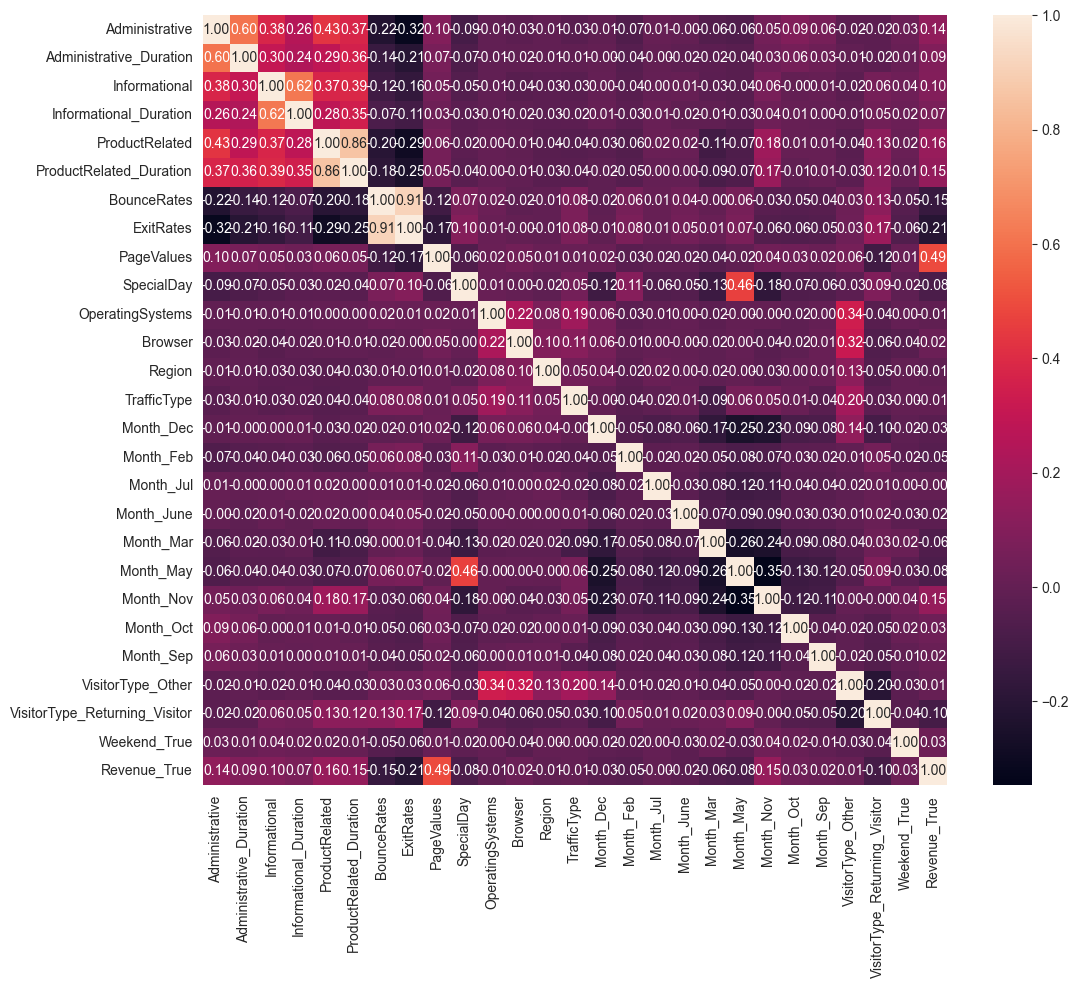

In [10]:
from sklearn.preprocessing import OneHotEncoder

# Select only the numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# One-hot encode the categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity
categorical_df = pd.DataFrame(encoder.fit_transform(df.select_dtypes(include=['object', 'bool'])))

# Get feature names from the original categorical variables
categorical_df.columns = encoder.get_feature_names_out(df.select_dtypes(include=['object', 'bool']).columns)

# Join the encoded categorical variables with the numeric variables
combined_df = pd.concat([numeric_df, categorical_df], axis=1)

# Calculate the correlation matrix
corr = combined_df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()


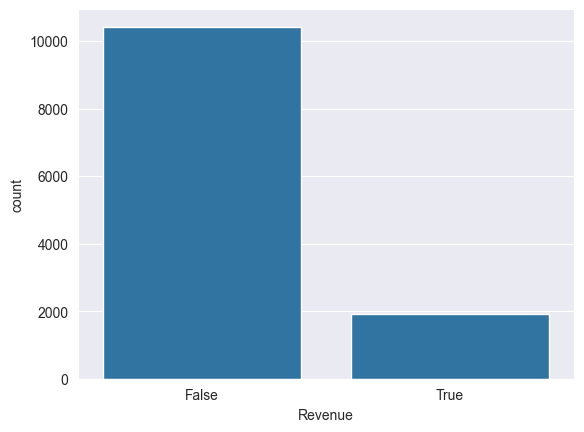

In [6]:
# Distribution of the target variable 'Revenue'
sns.countplot(x='Revenue', data=df)
plt.show()

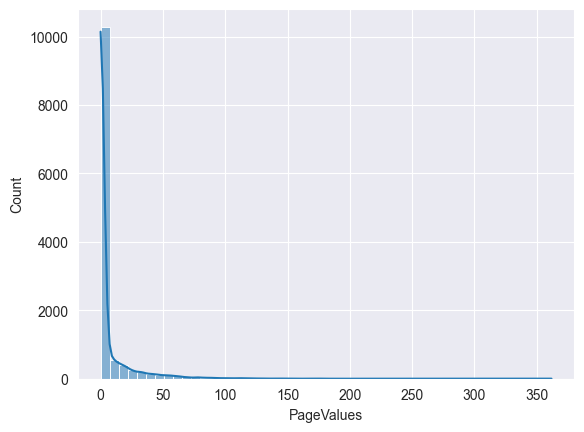

In [7]:
# Distribution of a numerical feature, for example 'PageValues'
sns.histplot(df['PageValues'], bins=50, kde=True)
plt.show()

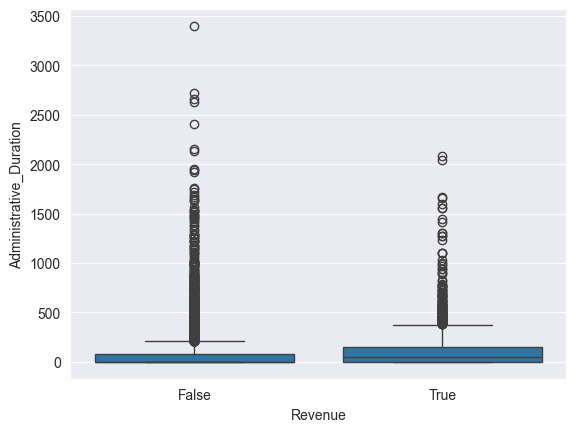

In [8]:
# Box plot for 'Administrative_Duration' split by 'Revenue'
sns.boxplot(x='Revenue', y='Administrative_Duration', data=df)
plt.show()

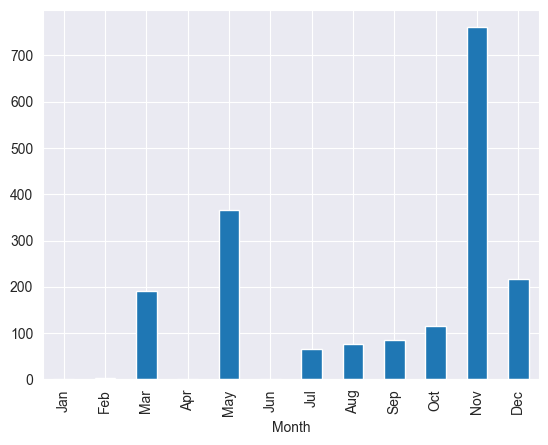

In [13]:
# Define the order of the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'Month' to a categorical type with the specified order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Now group by 'Month' and sum the 'Revenue', explicitly setting 'observed' to True
monthly_revenue = df.groupby('Month', observed=False)['Revenue'].sum()

# Plot the result - the months will be in the correct order
monthly_revenue.plot(kind='bar')
plt.show()